# Random Forest Classification for Penguin Species Prediction

# 0-Setup

This section contains all necessary library imports and initial configurations required for the analysis. We'll be using standard data science libraries including numpy, pandas, matplotlib, and seaborn for our analysis.

## The Data

We are going to use the 'Palmer Penguins' dataset because penguins are funny creatures. More info can be found at https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

<img src="images/penguin.jpg" style="max-width:400px">


Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

# 1-Data Loading and Exploration

In this section, we'll load and explore the Palmer Penguins dataset. This dataset contains physical measurements of three penguin species: Chinstrap, Adélie, and Gentoo. We'll examine the data structure, check for missing values, and understand the distribution of our target variable (species).

## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("datasets/penguins_size.csv")

In [8]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
df['species'].value_counts()
df = df[df['species'] != 'Chinstrap']
df['species'].value_counts()

species
Adelie    146
Gentoo    120
Name: count, dtype: int64

## Train | Test Split

# 2-Data Preprocessing

This section focuses on preparing our data for modeling. We'll perform the following steps:
1. Handle missing values
2. Convert categorical variables using one-hot encoding
3. Split the data into training and testing sets

In [10]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 3-Model Building

In this section, we'll create and train our Random Forest model. We'll explore:
1. Basic Random Forest implementation
2. Hyperparameter tuning
3. Model optimization through grid search

## Random Forest classification

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [15]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [16]:
preds = model.predict(X_test)

## Evaluation

# 4-Evaluation

This section focuses on evaluating our model's performance using various metrics:
1. Confusion Matrix
2. Classification Report
3. Feature Importance Analysis
4. Model Performance Analysis with different numbers of trees

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [18]:
cm = confusion_matrix(y_test,preds)

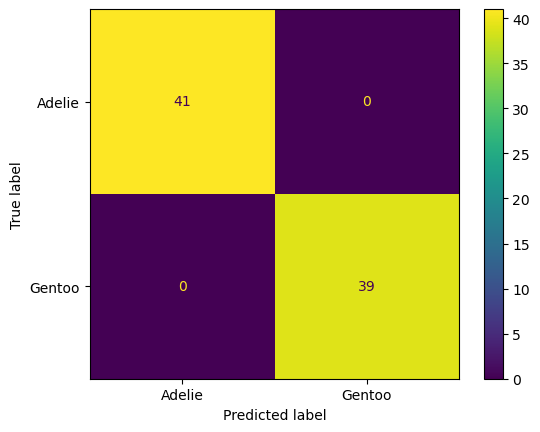

In [19]:

CM_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
CM_plot.plot()


## Feature Importance

Very useful attribute of the trained model!

In [20]:
model.feature_importances_

array([0.18434932, 0.14443913, 0.31060282, 0.19102235, 0.07796471,
       0.08763907, 0.00109041, 0.00289218])

## Choosing correct number of trees

Let's explore if continually adding more trees improves performance...

In [21]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

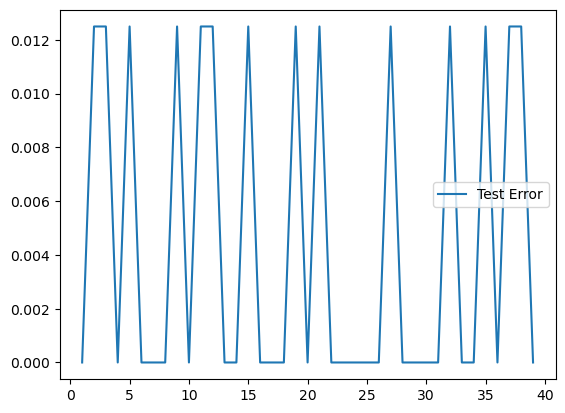

In [22]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Clearly there are diminishing returns, on such a small dataset, we've pretty much extracted all the information we can after about 5 trees.

## Random Forest - HyperParameter Exploration



https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [23]:
df = pd.read_csv("datasets/data_banknote_authentication.csv")

In [24]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [25]:
df = df.rename(columns=({'3.6216':'variance','8.6661':'skewness','-2.8073':'kurtosis','-0.44699':'entropy','0':'class'}))

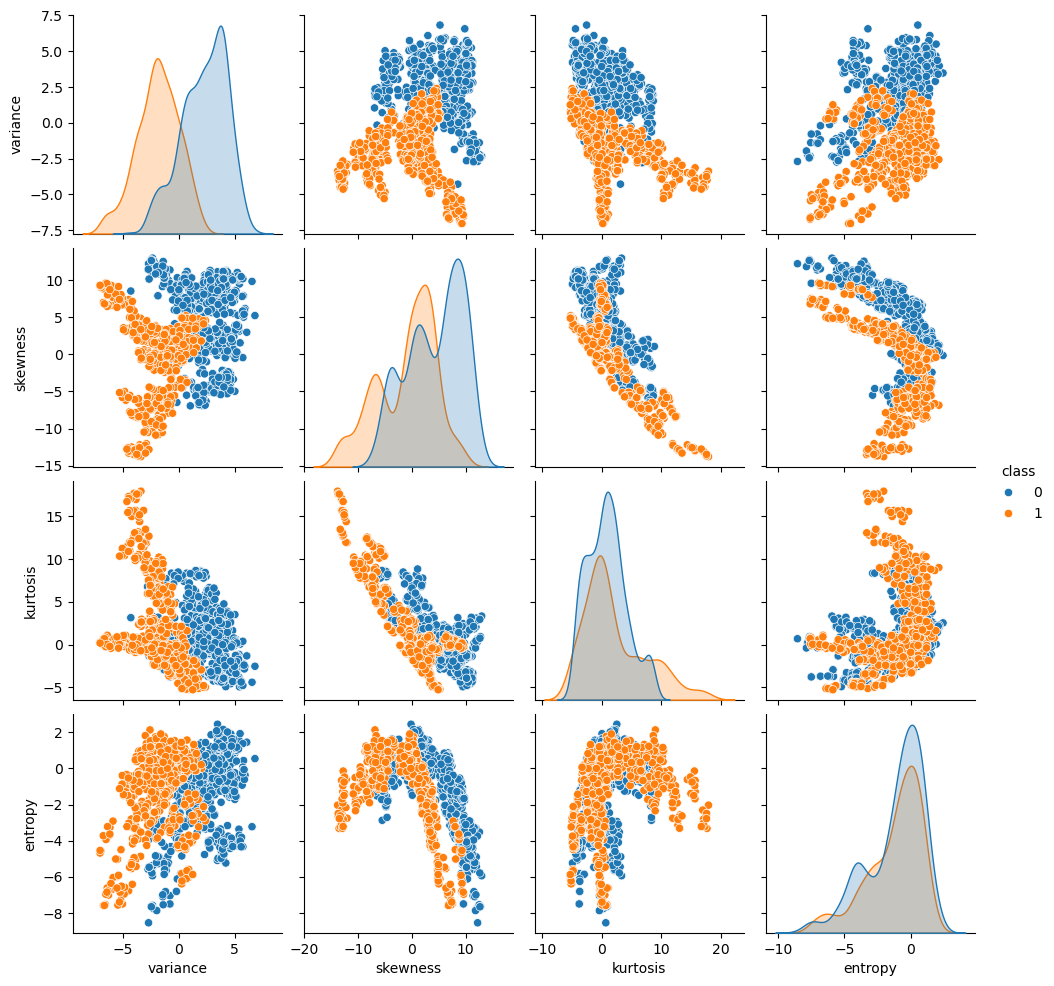

In [26]:
sns.pairplot(df,hue='class')

In [27]:
X = df.drop("class",axis=1)

In [28]:
y = df["class"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [31]:
from sklearn.model_selection import GridSearchCV

In [46]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True]  # Since we want to use oob_score, we must use bootstrap=True
oob_score = [True]  # Set to True to enable out-of-bag score calculation

In [47]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Using bootstrap=True to enable oob_score

In [48]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True]})

In [50]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [51]:
predictions = grid.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.99      1.00      0.99        93

    accuracy                           1.00       206
   macro avg       0.99      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



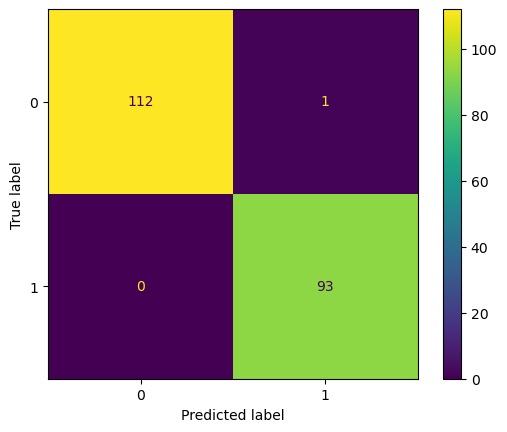

In [53]:

grid_confusion = confusion_matrix(y_test,predictions)
grid_CM_plot = ConfusionMatrixDisplay(confusion_matrix=grid_confusion, display_labels=grid.classes_)
grid_CM_plot.plot()


In [54]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

True

In [55]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_

0.992274678111588